<a href="https://colab.research.google.com/github/AkashDeepKumar/TopicModel-Reddit/blob/main/lda_test_Combined2_wo_filters_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive
%cd /gdrive/MyDrive/D5/509/Topic_Modeling/Code/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/MyDrive/D5/509/Topic_Modeling/Code


In [16]:
!pip install gensim
!pip install pyLDAvis

In [18]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

In [19]:
!python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

     |████████████████████████████████| 827.9 MB 47.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [20]:
input_df = pd.read_csv('Combined2.csv')

In [21]:
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [22]:
#nlp = spacy.load("en_core_web_lg")

documents = []
for i in input_df["MsgBody"]:
    i = i.lstrip("'")
    i = i.rstrip("'")
    documents.append(i)

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

**Term Statistics**

In [23]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

In [24]:
# data processing
for index, row in input_df.iterrows():
		text = row["MsgBody"]
		doc = nlp(str(text))
		num_of_comments += 1
		# statistics regarding words
		num_of_tokens = len(doc)
		total_number_of_tokens += num_of_tokens
		token_count_without_stop_words = 0
		for token in doc:
			if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
				pass
			else:
				unique_word.add(str(token).lower())
				token_count_without_stop_words += 1
		num_of_token_per_comment.append(num_of_tokens)
		num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
		# statistics regarding authors
		author_name = row["Author"]
		unique_author.add(str(author_name).lower())
		# statistics regarding time_stamp
		#time_stamp = row["Timestamp"]
		#time_stamp_list.append(time_stamp)
		# statistics regarding submissions
		thread_id = row["ThreadID"]
		unique_submission.add(thread_id)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [25]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))

number of comments: 31255
number of unique words: 26144
total number of words in the corpus: 1680620
average number of words in comments: 53.77123660214366
average number of words in comments without stop words: 27.377539593665013
maximum number of words in comments: 1890
maximum number of words in comments without stop words: 889
minimum number of words in comments: 3
minimum number of words in comments without stop words: 2
median number of words in comments: 34.0
median number of words in comments without stop words: 18.0
number of unique authors: 8429
number of comments replying to other comments: 0
number of sumbissions: 4126


In [26]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(0, 0.04786131261980692), (1, 0.08354470694592084), (15, 0.07460120179965134), (16, 0.045088079271314904), (49, 0.04538956434712483), (58, 0.11589528498707348), (59, 0.2089417721431879), (60, 0.2030219261794211), (61, 0.44912723342728256), (62, 0.32416218847722117), (63, 0.1245636724920435), (64, 0.2731149319610955), (65, 0.589986258151907), (66, 0.3527620993391518), (67, 0.11548009289936717)]


**NLP & TF-IDF**


In [27]:
documents = []
for line in input_df["MsgBody"]:
    text = line.lstrip("'")
    text = line.rstrip("'")
    doc = nlp(text)
    if "This is a friendly reminder that most photo posts should include a comment with some additional information" in text:
        pass
    elif len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," ").replace("“","").replace("‘","").replace("”","").replace("…","").replace("’","").replace("*","").replace("_","").replace("https","").replace(":","").replace("-","").replace("|","").replace("$","").replace(">","").replace("<","").replace("~","").replace("%","").replace("=","").replace("^","").replace("+",""))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    deletable = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','yo','fo','se','st','th','wo','ld','gh','co','go']
    deletable2 = ['post','moderator','comment','wow','hello','bot','subreddit','thank','oh','sure','etc','appreciate','right','pretty','ill','lol','thing','lot','well','Ill','Nice', 'day', 'usually', 'one', '3', 'welcome','point','have', 'ahh', '12', 'nice', 'sorry', 'haha', '15', '8', 'll', '400','D','5','20','cool','okay','ah','ohh']
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    temp_list = [item for item in temp_list if item not in deletable]
    temp_list = [item for item in temp_list if item not in deletable2]
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

**LDA Modeling**

In [28]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=10) # train LDA model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [29]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.4788202970563291


**LDA Model result analysis**

In [30]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.018*"photo" + 0.015*"strep" + 0.014*"link" + 0.010*"response" + 0.009*"doxy"')
(1, '0.009*"use" + 0.009*"wash" + 0.009*"water" + 0.009*"soap" + 0.009*"clean"')
(2, '0.008*"use" + 0.007*"cup" + 0.006*"shave" + 0.006*"period" + 0.006*"clean"')
(3, '0.013*"interesting" + 0.012*"yes" + 0.011*"hope" + 0.011*"hear" + 0.011*"look"')
(4, '0.023*"acid" + 0.022*"boric" + 0.012*"probiotic" + 0.012*"suppository" + 0.010*"yeast"')
(5, '0.023*"group" + 0.017*"strep" + 0.009*"smell" + 0.007*"yep" + 0.006*"yellow"')
(6, '0.007*"automatically" + 0.006*"#" + 0.006*"info" + 0.006*"copy" + 0.004*"billion"')
(7, '0.023*"test" + 0.010*"swab" + 0.008*"mycoplasma" + 0.007*"negative" + 0.007*"doctor"')
(8, '0.009*"eat" + 0.008*"USA" + 0.008*"probiotic" + 0.008*"yeast" + 0.007*"Strep"')
(9, '0.007*"not" + 0.006*"like" + 0.005*"doctor" + 0.005*"pelvic" + 0.005*"feel"')
[(0, 0.2240528829386068), (1, 0.6909191209928831), (2, 0.23675885509657812), (3, 0.2073526667916402), (4, 0.3995292370036244), (5, 0.46233

In [31]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


**Calculating candidate Coherence measures**

In [32]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2, random_state=777) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

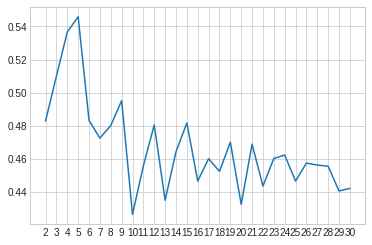

In [33]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

***LDA Model Result - Cluster change***

In [34]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=3) # train LDA model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [35]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.48212715551096474


In [36]:
for topic in lda_model.show_topics(num_topics=3, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.010*"test" + 0.006*"not" + 0.006*"doctor" + 0.005*"symptom" + 0.005*"like"')
(1, '0.006*"smell" + 0.006*"normal" + 0.005*"glad" + 0.005*"hair" + 0.005*"yes"')
(2, '0.009*"probiotic" + 0.008*"use" + 0.007*"acid" + 0.006*"try" + 0.006*"boric"')
[(0, 0.2240528829386068), (1, 0.6909191209928831), (2, 0.23675885509657812), (3, 0.2073526667916402), (4, 0.3995292370036244), (5, 0.4623392464201744)]
(0, 0.76463014)
(1, 0.10933574)
(2, 0.12603408)
 You could have utis and not know it so I wouldnt eliminate that Just talk to your doctor :  [(0, 0.7647376), (1, 0.109333485), (2, 0.12592886)]


In [37]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [42]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.010*"test" + 0.006*"not" + 0.006*"doctor" + 0.005*"symptom" + 0.005*"like"')
(1, '0.006*"smell" + 0.006*"normal" + 0.005*"glad" + 0.005*"hair" + 0.005*"yes"')
(2, '0.009*"probiotic" + 0.008*"use" + 0.007*"acid" + 0.006*"try" + 0.006*"boric"')
[(0, 0.2240528829386068), (1, 0.6909191209928831), (2, 0.23675885509657812), (3, 0.2073526667916402), (4, 0.3995292370036244), (5, 0.4623392464201744)]
(0, 0.7647807)
(1, 0.10933259)
(2, 0.12588674)
 You could have utis and not know it so I wouldnt eliminate that Just talk to your doctor :  [(0, 0.7646387), (1, 0.10933558), (2, 0.12602572)]


In [43]:
!pip install happytransformer
from happytransformer import HappyTextClassification
classifier = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

04/23/2022 20:28:44 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [44]:
# financialBERT
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

sentences = ["You could have utis and not know it so I wouldnt eliminate that. Just talk to your doctor",  
             "I finished my last pack the last week of November and about 2weeks later I blew up like a balloon! I felt like I was gaining weight at a ridiculously fast rate. My boobs grew SO MUCH and were SO PAINFUL. Mentally I just felt so off and not like myself and was so moody. Had crazy pelvic pain too. Fast forwarded 1.5weeks and I feel so much better. No more sore boobs feel like im my normal weight and mental state. pelvic pain is still there but im also slated to start my period soon so not worried.", 
             "It honestly sucks I miss what I used to share with my boyfriend my entire sex drive is gone because of this and I feel awful. Its so infuriating because I have no idea what to do. It wasnt always like this so Im so confused. Was it always like this with your wife? Or did it kinda start randomly?   Thank you for sharing though I hope you and your wife can figure things out as well and I hope she feels better one day too.", 
             ]
results = nlp(sentences)
print(results)

[{'label': 'neutral', 'score': 0.9986026883125305}, {'label': 'neutral', 'score': 0.8555796146392822}, {'label': 'neutral', 'score': 0.9970173835754395}]


In [45]:
#Sentiment_Analysis - TextBlob

from textblob import TextBlob
text = TextBlob("Did they check under the hood and clean? Sometimes a hair or other stuff can get stuck under there. Not fun") 
print(text.sentiment)

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


Sentiment(polarity=0.03055555555555557, subjectivity=0.42500000000000004)


In [47]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [48]:
#Sentiment_Analysis - Vader

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores("Did they check under the hood and clean? Sometimes a hair or other stuff can get stuck under there. Not fun"))

{'neg': 0.185, 'neu': 0.709, 'pos': 0.106, 'compound': -0.2505}
